<a href="https://colab.research.google.com/github/mohmaed7777/epilepsy-detection/blob/main/Copy_of_Epilepsy_Detection_Using_EEG_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [4]:
#3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# import our datasets from kaggle
! kaggle datasets download oussamabenhassine/epilepsy-detection-using-eeg-signals

 73% 9.00M/12.3M [00:00<00:00, 76.8MB/s]
100% 12.3M/12.3M [00:00<00:00, 94.8MB/s]


In [7]:
! unzip epilepsy-detection-using-eeg-signals.zip

Archive:  epilepsy-detection-using-eeg-signals.zip
  inflating: eeg_data.csv            


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
print('Ready to go!')

Ready to go!


In [9]:
data = pd.read_csv('/content/eeg_data.csv')
data.head()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1


In [10]:
data

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0


In [11]:
data.columns

Index(['FP1_power_delta', 'FP1_power_theta', 'FP1_power_alpha',
       'FP1_power_beta', 'FP1_power_gamma', 'FP2_power_delta',
       'FP2_power_theta', 'FP2_power_alpha', 'FP2_power_beta',
       'FP2_power_gamma',
       ...
       'T5_STD_D4', 'T5_STD_D5', 'T5_STD_D6', 'T6_STD_D1', 'T6_STD_D2',
       'T6_STD_D3', 'T6_STD_D4', 'T6_STD_D5', 'T6_STD_D6', 'epileptic_'],
      dtype='object', length=668)

In [12]:
data.dtypes

FP1_power_delta    float64
FP1_power_theta    float64
FP1_power_alpha    float64
FP1_power_beta     float64
FP1_power_gamma    float64
                    ...   
T6_STD_D3          float64
T6_STD_D4          float64
T6_STD_D5          float64
T6_STD_D6          float64
epileptic_           int64
Length: 668, dtype: object

In [13]:
data.isnull().sum()

FP1_power_delta    0
FP1_power_theta    0
FP1_power_alpha    0
FP1_power_beta     0
FP1_power_gamma    0
                  ..
T6_STD_D3          0
T6_STD_D4          0
T6_STD_D5          0
T6_STD_D6          0
epileptic_         0
Length: 668, dtype: int64

In [14]:
data.describe()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2784.618464,988.760235,746.234771,701.487094,1001.431795,2085.578266,992.570476,895.149975,668.364261,1031.370227,...,58.296417,88.001721,143.249343,34.949327,29.083232,46.686025,61.305950,91.994480,150.603345,0.460289
std,27119.740834,12199.666703,12018.648373,10668.946271,14544.502538,20670.847816,12618.098105,14047.391047,10791.187751,14990.469348,...,203.322445,304.407625,468.151048,315.861267,171.065282,217.826912,207.851277,308.832664,489.946628,0.498533
min,0.025945,0.012101,0.009409,0.007828,0.008412,0.026174,0.018836,0.010871,0.006120,0.006863,...,0.950777,1.057651,1.118569,0.525890,0.846936,0.878841,0.909989,0.918962,1.115070,0.000000
25%,25.524041,3.983245,1.868825,0.789355,0.381195,27.138890,4.254592,1.989122,0.845677,0.408081,...,12.298674,14.891381,23.835592,3.525874,5.796019,11.084702,14.190864,16.742939,26.750093,0.000000
50%,68.865751,8.807711,3.874506,1.795211,0.972968,73.483311,9.688978,4.133793,1.863871,0.973485,...,18.643405,23.730646,39.095777,5.855205,8.580373,15.806232,20.932141,27.049199,44.603975,0.000000
75%,271.174926,30.093458,12.052042,6.926863,3.777847,288.354575,29.503963,12.237335,7.139232,3.782326,...,32.798456,51.946562,84.372372,11.453332,14.326938,27.297323,36.869445,57.139089,101.925711,1.000000
max,859895.816209,350651.120898,403916.724142,291058.726462,285573.572449,604373.606743,346870.948081,407756.698134,291640.733124,287933.513127,...,3283.112473,5501.471732,11030.429643,5777.660876,3620.162008,4585.801410,3620.523797,5538.873638,10730.168759,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Columns: 668 entries, FP1_power_delta to epileptic_
dtypes: float64(667), int64(1)
memory usage: 11.3 MB


In [16]:
# Examine the correaltion and skewed rows : 
corr_mat = data.corr()
for x in range(corr_mat.shape[0]):
  corr_mat.iloc[x,x] = 0.0

corr_mat  

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
FP1_power_delta,0.000000,0.597389,0.419714,0.320018,0.285790,0.937439,0.583875,0.435526,0.359076,0.271115,...,0.708348,0.750890,0.771528,0.370518,0.535774,0.567108,0.704875,0.714669,0.743068,0.001203
FP1_power_theta,0.597389,0.000000,0.966870,0.854606,0.746975,0.612743,0.876825,0.902870,0.853503,0.717770,...,0.746224,0.694555,0.500477,0.734618,0.863155,0.870292,0.763765,0.691106,0.507375,0.030894
FP1_power_alpha,0.419714,0.966870,0.000000,0.891463,0.771047,0.450005,0.823014,0.903632,0.868846,0.737023,...,0.627140,0.551249,0.348365,0.731775,0.826396,0.815057,0.653646,0.559538,0.358227,0.041936
FP1_power_beta,0.320018,0.854606,0.891463,0.000000,0.871032,0.354445,0.767653,0.854345,0.878604,0.803583,...,0.591509,0.485392,0.276455,0.790828,0.820048,0.793785,0.618890,0.496563,0.284465,0.056143
FP1_power_gamma,0.285790,0.746975,0.771047,0.871032,0.000000,0.324560,0.748854,0.829906,0.907138,0.917221,...,0.643682,0.502523,0.279947,0.965140,0.899813,0.857232,0.673378,0.523108,0.286900,0.059341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T6_STD_D3,0.567108,0.870292,0.815057,0.793785,0.857232,0.637278,0.911908,0.906013,0.898312,0.805425,...,0.886013,0.803321,0.613966,0.896750,0.986751,0.000000,0.919027,0.831665,0.632449,0.036190
T6_STD_D4,0.704875,0.763765,0.653646,0.618890,0.673378,0.779311,0.801528,0.718850,0.697918,0.634047,...,0.970915,0.930205,0.842277,0.759768,0.879019,0.919027,0.000000,0.954511,0.857593,0.010335
T6_STD_D5,0.714669,0.691106,0.559538,0.496563,0.523108,0.778185,0.732853,0.616230,0.567009,0.493068,...,0.933505,0.962446,0.886207,0.621807,0.772119,0.831665,0.954511,0.000000,0.910654,-0.020460
T6_STD_D6,0.743068,0.507375,0.358227,0.284465,0.286900,0.810575,0.554328,0.392722,0.334377,0.274682,...,0.846688,0.890235,0.961853,0.405043,0.567452,0.632449,0.857593,0.910654,0.000000,-0.048854


In [17]:
# Sorting the features due to thier corr to each others : 
corr_mat.abs().idxmax()

FP1_power_delta     F4_power_delta
FP1_power_theta    FP1_power_alpha
FP1_power_alpha    FP1_power_theta
FP1_power_beta     FP1_Mean_Abs_D2
FP1_power_gamma     T6_power_gamma
                        ...       
T6_STD_D3                T6_STD_D2
T6_STD_D4                O2_STD_D4
T6_STD_D5                T5_STD_D5
T6_STD_D6                O2_STD_D6
epileptic_               A2_STD_D1
Length: 668, dtype: object

In [18]:
# Examine the skew values and log transformation :
log_cols = data.skew().sort_values(ascending=False)
log_cols = log_cols.loc[log_cols > 0.75]
log_cols

T1_power_theta    46.279741
T2_power_theta    46.258448
T2_power_alpha    46.215464
T1_power_alpha    46.150686
T2_Mean_D6        45.225480
                    ...    
T5_Mean_D4         4.732885
T4_Mean_D3         3.585273
FP1_Mean_D4        3.209620
FP1_Mean_D5        1.872478
F7_Mean_D4         1.050234
Length: 495, dtype: float64

**this means the data is not normally disrtibuted.**

In [19]:
import seaborn as sns

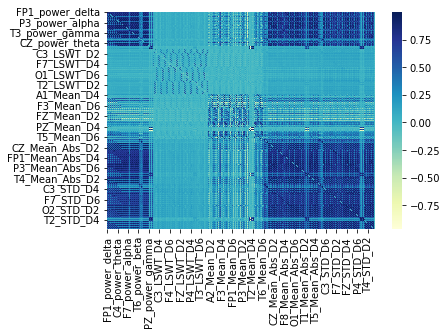

In [20]:
sns.heatmap(corr_mat, cmap='YlGnBu', annot=False)
plt.show()

In [21]:
normalized_df=(data-data.mean())/data.std()

# **Applying PCA (DIM reduction):**

* **Perform PCA with n_components ranging from 1 to 10**

* **Store the amount of explained variance for each number of dimensions.**

* **Also store the feature importance for each number of dimensions. Hint: PCA doesn't explicitly provide this after a model is fit, but the components_ properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.**

* **Plot the explained variance and feature importances.**

In [22]:
from sklearn.decomposition import PCA

In [27]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 21):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(normalized_df)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': normalized_df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.394981
2,PCA(n_components=2),0.501194
3,PCA(n_components=3),0.545982
4,PCA(n_components=4),0.585101
5,PCA(n_components=5),0.614487
6,PCA(n_components=6),0.638603
7,PCA(n_components=7),0.657416
8,PCA(n_components=8),0.674417
9,PCA(n_components=9),0.690427


**create a table of feature importtances for each data column:**

In [28]:
feature_df = (pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values'))
feature_df

features,A1_LSWT_D1,A1_LSWT_D2,A1_LSWT_D3,A1_LSWT_D4,A1_LSWT_D5,A1_LSWT_D6,A1_Mean_Abs_D1,A1_Mean_Abs_D2,A1_Mean_Abs_D3,A1_Mean_Abs_D4,...,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,T6_power_alpha,T6_power_beta,T6_power_delta,T6_power_gamma,T6_power_theta,epileptic_
n,,,,,,,,,,,,,,,,,,,,,
1,0.000227,0.000262,0.000335,0.000094,0.000315,0.000352,0.001415,0.001241,0.001939,0.002004,...,0.002752,0.002627,0.002377,0.001912,0.002531,0.002507,0.002045,0.002441,0.002612,0.000108
2,0.000296,0.000284,0.000305,0.000134,0.000172,0.000226,0.001331,0.000792,0.001382,0.002133,...,0.001728,0.001926,0.002147,0.002540,0.002023,0.002344,0.002761,0.002530,0.001531,0.000208
3,0.000626,0.000525,0.000649,0.000168,0.000122,0.000234,0.001020,0.000785,0.001334,0.001921,...,0.001295,0.001847,0.002254,0.002680,0.001821,0.002076,0.002018,0.002014,0.001562,0.000241
4,0.000724,0.000646,0.000796,0.000190,0.000337,0.000252,0.000947,0.000851,0.001376,0.001816,...,0.001188,0.001785,0.002232,0.002601,0.001563,0.001803,0.001679,0.001656,0.001417,0.000258
5,0.000712,0.000694,0.000729,0.000439,0.000401,0.000474,0.001433,0.001261,0.001701,0.001962,...,0.001132,0.001432,0.002006,0.002118,0.001807,0.001735,0.001441,0.001670,0.001779,0.000321
6,0.000713,0.000959,0.000669,0.000688,0.000633,0.000678,0.001467,0.001587,0.002045,0.001938,...,0.001000,0.001243,0.001796,0.001912,0.001675,0.001497,0.001338,0.001460,0.001595,0.000316
7,0.000859,0.000939,0.000920,0.001113,0.000583,0.001186,0.001645,0.002016,0.002488,0.002126,...,0.000905,0.001108,0.001591,0.001763,0.001545,0.001442,0.001288,0.001291,0.001542,0.000421
8,0.001085,0.001225,0.001433,0.001540,0.000815,0.001066,0.001582,0.001926,0.002327,0.001928,...,0.000837,0.001014,0.001515,0.001596,0.001419,0.001289,0.001246,0.001240,0.001408,0.000487
9,0.001010,0.001163,0.001396,0.002059,0.001283,0.001318,0.001566,0.002063,0.002490,0.001922,...,0.000785,0.000998,0.001364,0.001576,0.001403,0.001180,0.001174,0.001187,0.001328,0.000445


**Create a plot of explanined varinces:**

[Text(0, 0.5, 'percent explained varince'),
 Text(0.5, 0, 'Number of dimensions'),
 Text(0.5, 1.0, 'Explained varince vs dimensions')]

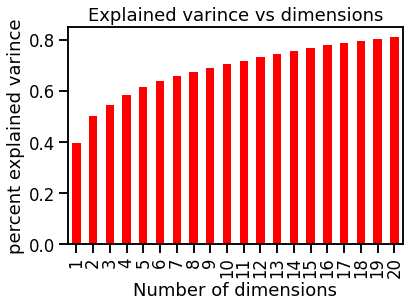

In [29]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar', color='red')
ax.set(xlabel = 'Number of dimensions',
      ylabel='percent explained varince',
      title='Explained varince vs dimensions')